In [1]:
import torch
from torchvision import models
import torchvision.transforms as transforms
import skimage
import numpy as np
%cd ../

/home/paperspace/mlproj2_new/ActMax-Optimizer-Dev


In [2]:
from transformers.tf_exp import ImageLoader

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


In [4]:
nature_loader_0 = ImageLoader('../../Datasets/imagenette2/val/n01440764')
nature_loader_1 = ImageLoader('../../Datasets/imagenette2/val/n02102040')
nature_loader_2 = ImageLoader('../../Datasets/imagenette2/val/n02979186')
nature_loader_3 = ImageLoader('../../Datasets/imagenette2/val/n03000684')
nature_loader_4 = ImageLoader('../../Datasets/imagenette2/val/n03445777')
syn_loader = ImageLoader('./results/evolutions/vit_b_16/tench')

In [5]:
nature_loader_0.load()
nature_loader_1.load()
nature_loader_2.load()
nature_loader_3.load()
nature_loader_4.load()
syn_loader.load()

100%|██████████| 50/50 [00:00<00:00, 164.58it/s]


50

In [6]:
nature_imgs_0 = nature_loader_0.imgs.to(device) / 255.
nature_imgs_1 = nature_loader_1.imgs.to(device) / 255.
nature_imgs_2 = nature_loader_2.imgs.to(device) / 255.
nature_imgs_3 = nature_loader_3.imgs.to(device) / 255.
nature_imgs_4 = nature_loader_4.imgs.to(device) / 255.
syn_imgs = syn_loader.imgs.to(device) / 255.

In [7]:
# Load the AlexNet model and extract activation vectors
resnet = models.resnet101(weights=models.ResNet101_Weights.DEFAULT).to(device)

In [8]:
resnet.eval()
with torch.no_grad():
    nature_vectors_0 = resnet(nature_imgs_0)
    nature_vectors_1 = resnet(nature_imgs_1)
    nature_vectors_2 = resnet(nature_imgs_2)
    nature_vectors_3 = resnet(nature_imgs_3)
    nature_vectors_4 = resnet(nature_imgs_4)
    syn_vectors = resnet(syn_imgs)

In [9]:
nature_vectors = torch.cat((nature_vectors_0, nature_vectors_1, nature_vectors_2, nature_vectors_3, nature_vectors_4), dim=0)

In [10]:
nature_imgs = torch.cat((nature_imgs_0, nature_imgs_1, nature_imgs_2, nature_imgs_3, nature_imgs_4), dim=0)

In [11]:
# Calculate distance between generated vector and natural vectors
distances = [torch.norm(syn_vectors[0] - vector).item() for vector in nature_vectors]

# Select the closest natural images
num_closest = 16  # Number of closest images to select
closest_indices = torch.argsort(torch.tensor(distances))[:num_closest]
closest_images = [nature_imgs[i] for i in closest_indices]

In [12]:
closest_indices

tensor([333, 173, 188, 254,  80, 151, 125, 382, 253, 384, 240, 263, 288, 339,
        346, 336])

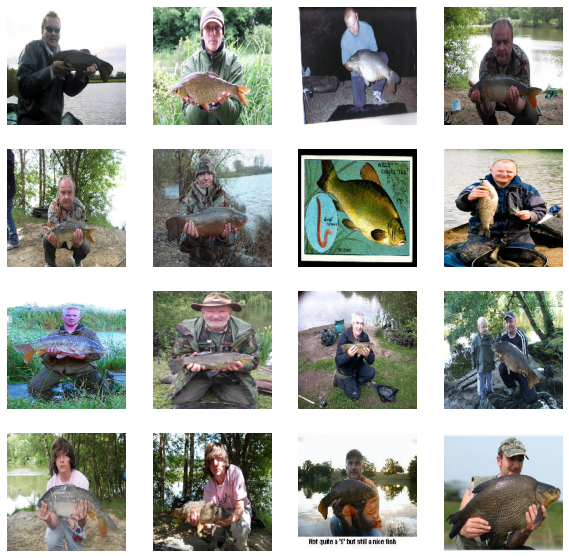

In [13]:
# Plot the closest images in a grid
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
for i in range(num_closest):
    plt.subplot(4, 4, i+1)
    plt.imshow(closest_images[i].cpu().numpy().transpose(1, 2, 0))
    plt.axis('off')
plt.show()

In [14]:
# Select the furthest natural images
num_furthest = 16  # Number of furthest images to select
furthest_indices = torch.argsort(torch.tensor(distances))[-num_furthest:]
furthest_images = [nature_imgs[i] for i in furthest_indices]

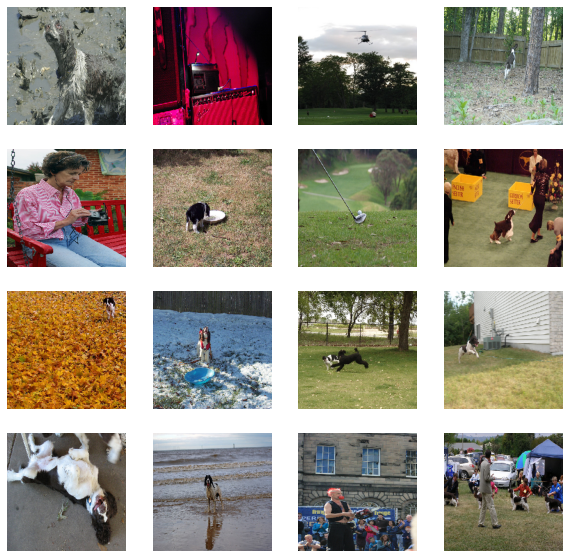

In [15]:
# Plot the furthest images
plt.figure(figsize=(10, 10))
for i in range(num_furthest):
    plt.subplot(4, 4, i+1)
    plt.imshow(furthest_images[i].cpu().numpy().transpose(1, 2, 0))
    plt.axis('off')
plt.show()

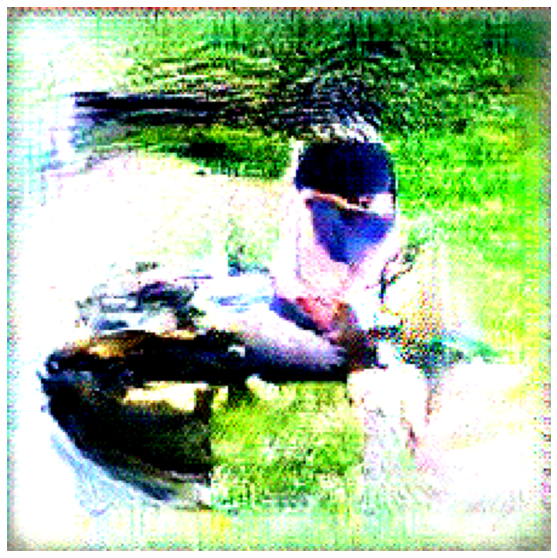

In [16]:
# Plot the generated image
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(syn_imgs[0].cpu().numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()

In [17]:
syn_loader_2 = ImageLoader('./results/evolutions/vit_b_16/golf_ball')
syn_loader_2.load()
syn_imgs_2 = syn_loader_2.imgs.to(device) / 255.

100%|██████████| 50/50 [00:00<00:00, 151.95it/s]


In [18]:
resnet.eval()
with torch.no_grad():
    syn_vectors_2 = resnet(syn_imgs_2)

In [19]:
# Calculate distance between generated vector and natural vectors
distances = [torch.norm(syn_vectors_2[1] - vector).item() for vector in nature_vectors]

# Select the closest natural images
num_closest = 16  # Number of closest images to select
closest_indices = torch.argsort(torch.tensor(distances))[:num_closest]
closest_images = [nature_imgs[i] for i in closest_indices]

In [20]:
closest_indices

tensor([1537, 1601, 1694, 1652, 1516, 1802, 1691, 1862, 1547, 1668, 1598, 1580,
        1835, 1710, 1768, 1870])

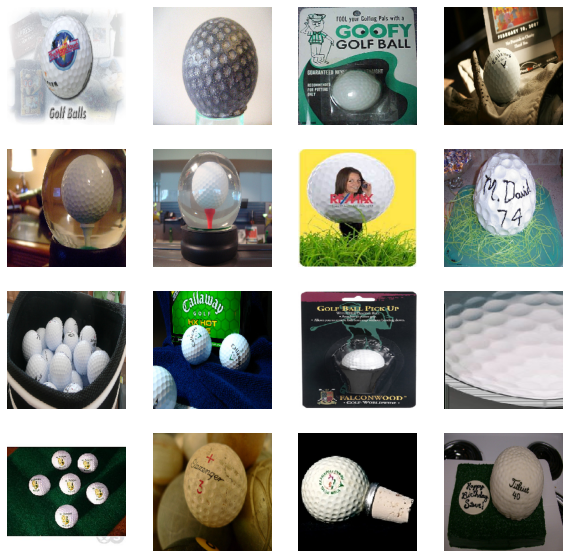

In [21]:
# Plot the closest images
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 10))
for i in range(num_closest):
    plt.subplot(4, 4, i+1)
    plt.imshow(closest_images[i].cpu().numpy().transpose(1, 2, 0))
    plt.axis('off')
plt.show()

In [22]:
# Select the furthest natural images
num_furthest = 16  # Number of furthest images to select
furthest_indices = torch.argsort(torch.tensor(distances))[-num_furthest:]
furthest_images = [nature_imgs[i] for i in furthest_indices]

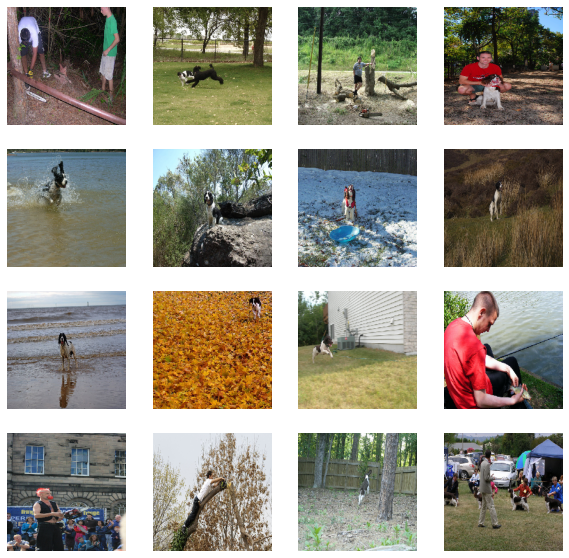

In [23]:
# Plot the furthest images
plt.figure(figsize=(10, 10))
for i in range(num_furthest):
    plt.subplot(4, 4, i+1)
    plt.imshow(furthest_images[i].cpu().numpy().transpose(1, 2, 0))
    plt.axis('off')
plt.show()

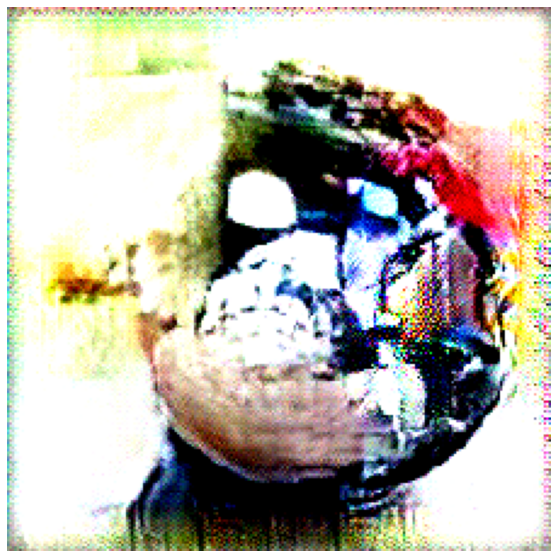

In [24]:
# Plot the generated image
plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.imshow(syn_imgs_2[1].cpu().numpy().transpose(1, 2, 0))
plt.axis('off')
plt.show()